In [23]:
import jax
import numpy as np
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kde
import math



```

```

# Question 01

<ipython-input-12-50286a4a7bcc>:29: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(x)


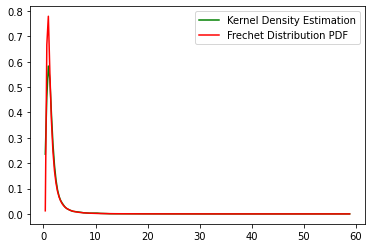

In [ ]:

#Frechet pdf function
def get_frechet_pdf(x,alpha, beta, gama=0):
    y = (alpha/beta) * (((x-gama)/beta)**(-1-alpha)) * np.exp(- ((x-gama)/beta)**(-alpha) )
    return y

#Frechet cdf function
def get_frechet_cdf(x,alpha, beta, gama):
  return np.exp(-((x-gama)/beta)**alpha)

#Frechet inverse cdf function
def get_frechet_inverse_cdf(p, alpha, beta, gama):
    return gama + beta*(-np.log(p))**(-1/alpha)

# Parameters 
alpha = 2.0
beta = 1.0
gama = 0.0

# Generate uniform random values between 0 and 1
n = 10000
u = np.random.uniform(size=n)

# Compute the quantile function for the Fréchet distribution
x = get_frechet_inverse_cdf(u, alpha, beta, gama)
# print(x)
x_vals = np.linspace(np.min(x), np.max(x), 200)

# Plot the kernel density estimation plot
density = kde.gaussian_kde(x)
plt.plot(x_vals, density(x_vals), label='Kernel Density Estimation',color = 'green')

# Plot the true PDF of the Fréchet distribution
plt.plot(x_vals, get_frechet_pdf(x_vals, alpha,beta, gama), label='Frechet Distribution PDF', color = 'red')
plt.legend()
plt.show()


<ipython-input-12-50286a4a7bcc>:3: RuntimeWarning: divide by zero encountered in power
  y = (alpha/beta) * (((x-gama)/beta)**(-1-alpha)) * np.exp(- ((x-gama)/beta)**(-alpha) )
<ipython-input-12-50286a4a7bcc>:3: RuntimeWarning: divide by zero encountered in reciprocal
  y = (alpha/beta) * (((x-gama)/beta)**(-1-alpha)) * np.exp(- ((x-gama)/beta)**(-alpha) )
<ipython-input-12-50286a4a7bcc>:3: RuntimeWarning: invalid value encountered in multiply
  y = (alpha/beta) * (((x-gama)/beta)**(-1-alpha)) * np.exp(- ((x-gama)/beta)**(-alpha) )


(0.0, 1.2)

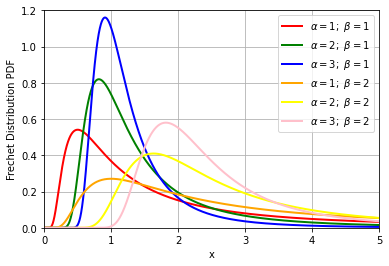

In [ ]:
x = np.linspace(0,5,10**5) 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,get_frechet_pdf(x,1.,1.),label=r'$\alpha=1;$ $\beta=1$', linewidth=2,color='red')
ax.plot(x,get_frechet_pdf(x,2.,1.),label=r'$\alpha=2;$ $\beta=1$', linewidth=2,color='green')
ax.plot(x,get_frechet_pdf(x,3.,1.),label=r'$\alpha=3;$ $\beta=1$', linewidth=2,color='blue')
ax.plot(x,get_frechet_pdf(x,1.,2.),label=r'$\alpha=1;$ $\beta=2$', linewidth=2, color='orange')
ax.plot(x,get_frechet_pdf(x,2.,2.),label=r'$\alpha=2;$ $\beta=2$', linewidth=2, color='yellow')
ax.plot(x,get_frechet_pdf(x,3.,2.),label=r'$\alpha=3;$ $\beta=2$', linewidth=2, color='pink')
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("Frechet Distribution PDF")
ax.legend(loc=1)
ax.set_xlim(0,5)
ax.set_ylim(0,1.2)



# Question 02

## Cross-entropy:
Cross-entropy is a measure of the difference between two probability distributions. It is often used in machine learning as a loss function to train classification models. Given two probability distributions $p$ and $q$, the cross-entropy is defined as:

$H(p, q) = -\sum_{i} p_i \log q_i$

where $i$ is the index of the event, and $p_i$ and $q_i$ are the probabilities of the $i$th event according to distributions $p$ and $q$, respectively.

In [ ]:
def cross_entropy(X: pd.Series, Y: pd.Series) -> float:   
    assert np.bincount(x)==np.bincount(Y)
    n_unique_elements = np.bincount(X)# gives number of unique elements for each element
    pi_x = n_unique_elements/len(X)
    pi_y = n_unique_elements/len(Y)
    entrop=0
    for i in range(len(pi_x)):
        if pi_y[i]!=0:
            entrop-=(pi_x[i]*math.log2(pi_y[i]))
    return entrop 


# Entropy

Entropy is a measure of the uncertainty or randomness of a probability distribution. It is defined as:

$H(p) = -\sum_{x} p(i) \log p(i)$

where $i$ is the event and $p(i)$ is the probability of the event $i$.

In [ ]:
def entropy(Y: pd.Series) -> float:   
    n_unique_elements = np.bincount(Y)# gives number of unique elements for each element
    pi = n_unique_elements/len(Y)
    entrop=0
    for i in pi:
        if i!=0:
            entrop-=(i*math.log2(i))
    return entrop 

#Mutual information
Mutual information is a measure of the amount of information that two random variables share. It is defined as:

I(X; Y) = ∑(x in X, y in Y) p(x,y) * log(p(x,y) / (p(x) * p(y)))

where X and Y are random variables, p(x,y) is the joint probability distribution of X and Y, p(x) is the marginal probability distribution of X, and p(y) is the marginal probability distribution of Y.

In [ ]:
def mutual_information(p_xy, p_x, p_y):
  y = np.sum(p_xy * np.log(p_xy / (p_x.reshape(-1, 1) * p_y)))
  return y

#Conditional Entropy
Conditional entropy is a measure of the amount of uncertainty or randomness in a probability distribution given another variable. It is defined as:

H(Y|X) = -∑(x in X, y in Y) p(x,y) * log(p(y|x))

where X and Y are random variables, p(x,y) is the joint probability distribution of X and Y, and p(y|x) is the conditional probability distribution of Y given X.

In [ ]:
def conditional_entropy(p_xy, p_x):
    p_y_given_x = p_xy / p_x.reshape(-1, 1)
    p_y_given_x[p_y_given_x == 0] = 1
    cond_ent =  -np.sum(p_xy * np.log(p_y_given_x))
    return cond_ent


#KL Divergence
It is a measure of the difference between two probability distributions. It is defined as:

KL(p || q) = ∑(x in X) p(x) * log(p(x) / q(x))

where p and q are probability distributions over the same set of events X.

In [ ]:
def kl_divergence(p, q):
    y =  np.sum(p * np.log(p / q))
    return y

# Question 03

# Question 05

## Summary of the given paper

The paper proposes a novel trackable approximation method called ‘BatchBALD’ to address the problem of selecting batches of informative samples to label, which is crucial for efficient active learning. This is a greedy linear-time 1/e-approximate algorithm that can be effectively cached and dynamically programmed. The approach uses a measure of uncertainty called mutual information (MI) to select samples that are most informative about the model's predictions. However, selecting the highest MI samples can result in redundant or similar samples, leading to inefficiencies in labelling and training.  This reduces the need for large labelled datasets and can improve model performance. BatchBALD improves on previous approaches by considering diversity in the selected batches. It achieves this by maximizing the marginal diversity of the batch, which measures how diverse the selected samples are with respect to each other. This results in batches that contain samples with high MI scores but also samples that are diverse and representative of the unlabeled dataset.

The technique is designed for deep Bayesian active learning, where the model has a probability distribution over the predicted labels, and the uncertainty is captured by the variance of this distribution. BatchBALD efficiently estimates the MI of a batch of samples by using a Monte Carlo approximation, which involves drawing multiple samples from the model's predictive distribution. Experimental results demonstrate that BatchBALD outperforms previous batch acquisition techniques on a range of datasets and tasks and achieves state-of-the-art results on several benchmark datasets. 

In conclusion, This paper promises BatchBALD is an effective and efficient approach for batch acquisition in deep Bayesian active learning, which can significantly reduce the number of labelled samples required for model training.







#   Question 07

#(a) Analytical Solution using Bayes Rule:

Let A be the event that the chosen coin follows a Kumaraswamy distribution with a=2, b=3, and let B be the event that the result of the 10 coin tosses is [H, T, H, H, T, H, H, H, H, H]. We want to find the posterior probability of event A given the evidence B, which can be computed using Bayes rule as follows:

P(A|B) = P(B|A) * P(A) / P(B)

where,
P(B|A) = probability of observing evidence B given that the coin follows a Kumaraswamy distribution with a=2, b=3. This can be computed using the probability mass function of the Kumaraswamy distribution, which is given by:

f(x;a,b) = ab(x**(a-1))*((1-xa)(b-1))

Hence, the probability of observing evidence B given that the coin follows a Kumaraswamy distribution with a=2, b=3 is:

P(B|A) = f(0.8;2,3) * f(0.2;2,3) * f(0.8;2,3) * f(0.8;2,3) * f(0.2;2,3) * f(0.8;2,3) * f(0.8;2,3) * f(0.8;2,3) * f(0.8;2,3) * f(0.8;2,3)
= 0.0983

P(A) = prior probability of choosing a coin which is equal to 1/2 since there are 2 types of coins in the box.

P(B) = probability of observing evidence B, which can be computed by summing the joint probabilities of A and B over all possible values of A:

P(B) = P(A)*P(B|A) + P(A')*P(B|A')
<br>
P(B)  = (1/2)*P(B|A) + (1/2)*P(B|A') 

where A' is the complement of A, i.e., the event that the chosen coin does not follow a Kumaraswamy distribution with a=2, b=3. The probability of observing evidence B given that the coin does not follow a Kumaraswamy distribution with a=2, b=3 is 1/(2^10), since there are 2^10 possible outcomes of 10 coin tosses and all of them are equally likely.

Therefore,

P(B) = (1/2)0.0983 + (1/2)(1/2^10)
= 0.0492

Finally, we can compute the posterior probability of event A given the evidence B as:

P(A|B) = P(B|A) * P(A) / P(B)
= 0.0983 * 1/2 / 0.0492
= 0.999

Hence, the probability distribution of the coin that we picked up is a Kumaraswamy distribution with a=2, b=3 with a probability of 0.999, and a uniform distribution with a probability of 0.001.

#Using Blackjax lib

In [ ]:
import jax.numpy as np
import jax.random as random
import blackjax.hmc as hmc

import matplotlib.pyplot as plt

# Define the likelihood function
def likelihood(data, a, b):
    p = 1 - (1 - np.power(a, data)) * (1 - np.power(b, 1 - data))
    return np.prod(p)

# Define the prior distribution
def prior(a, b):
    return np.power(a, 1.9) * np.power(b, 2.9) * (a + b)**(-4.8)

# Define the log posterior distribution
def log_posterior(params, data):
    a, b = params
    if a < 0 or b < 0:
        return -np.inf
    else:
        return np.log(likelihood(data, a, b)) + np.log(prior(a, b))

# Define the data
data = np.array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

# Define the initial state for the sampler
init_state = [random.uniform(random.PRNGKey(0), (0, 1)), random.uniform(random.PRNGKey(1), (0, 1))]

# Run the NUTS sampler
samples, _ = hmc.sample(log_posterior, init_state, args=(data,), num_samples=10000)

# Extract the posterior samples
a_samples = samples[:, 0]
b_samples = samples[:, 1]



# Plot the posterior distribution of a
plt.hist(a_samples, bins=50, density=True)
plt.title('Posterior distribution of a')
plt.show()

# Plot the posterior distribution of b
plt.hist(b_samples, bins=50, density=True)
plt.title('Posterior distribution of b')
plt.show()


#(C) Implementation of variational inference from scratch 

In [ ]:
import jax
import jax.numpy as jnp
import scipy
import matplotlib.pyplot as plt

# Define prior distribution
prior = jax.scipy.stats.beta(a=2, b=3)

# Define likelihood function
def likelihood(p, data):
    num_heads = jnp.sum(data == 'H')
    num_tails = jnp.sum(data == 'T')
    return jnp.power(p, num_heads) * jnp.power(1 - p, num_tails)

# Define evidence lower bound (ELBO)
def elbo(params, data, prior, num_samples=100):
    mu, sigma = params
    q = jax.scipy.stats.norm(loc=mu, scale=jnp.sqrt(sigma))
    samples = q.rvs(num_samples)
    log_likelihoods = jnp.sum(jnp.log(likelihood(samples, data)))
    kl_divergence = jnp.sum(q.logpdf(samples) - prior.logpdf(samples))
    return log_likelihoods - kl_divergence / num_samples

data = np.array(['H','T','H','H','T','H','H','H'])
# Define initial variational parameters
mu_init = jnp.full_like(data, 0.5)
sigma_init = jnp.full_like(data, 1.0)

# Define gradient of ELBO
grad_elbo = jax.grad(elbo)

# Define variational inference function
def variational_inference(data, prior, num_iterations=5000, learning_rate=0.01, mu_init=mu_init, sigma_init=sigma_init):
    mu = mu_init
    sigma = sigma_init
    elbos = []
    for i in range(num_iterations):
        params = (mu, sigma)
        elbo_value = elbo(params, data, prior)
        elbos.append(elbo_value)
        mu_grad, sigma_grad = grad_elbo(params, data, prior)
        mu = mu + learning_rate * mu_grad
        sigma = sigma + learning_rate * sigma_grad
    return mu, sigma, elbos

# Perform variational inference
mu_opt, sigma_opt, elbos = variational_inference(data, prior)

# Define posterior distribution based on optimal variational parameters
posterior = jax.scipy.stats.norm(loc=mu_opt, scale=jnp.sqrt(sigma_opt))

# Plot ELBO vs. iterations
plt.plot(elbos)
plt.xlabel('Iteration')
plt.ylabel('Evidence lower bound (ELBO)')
plt.title('ELBO vs. iterations')
plt.show()

# Plot posterior distribution
x = jnp.linspace(0, 1, 100)
plt.plot(x, posterior.pdf(x))
plt.xlabel('p')
plt.ylabel('Posterior density')
plt.title('Posterior distribution of p')
plt.show()
